<a href="https://colab.research.google.com/github/aminedahire/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering**

# TP: Machine Learning (SIA_3611)




In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles             

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

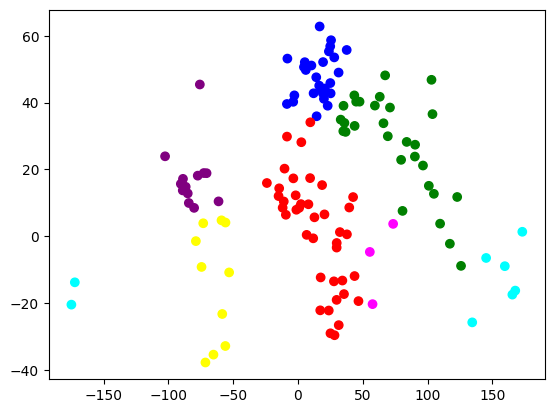

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt


## What do the coordinates correspond to?


  * Africa: red
  * Asia: green
  * Europe: blue
  * North America: purple
  * South America: yellow
  * Seven seas: magenta
  * Oceania: cyan

The coordinates correspond to the geographical positions of countries:


1.   The x-axis (np1[:,0]) represents the Longitude of each country.
2.   The y-axis (np1[:,1]) represents the Latitude of each country.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

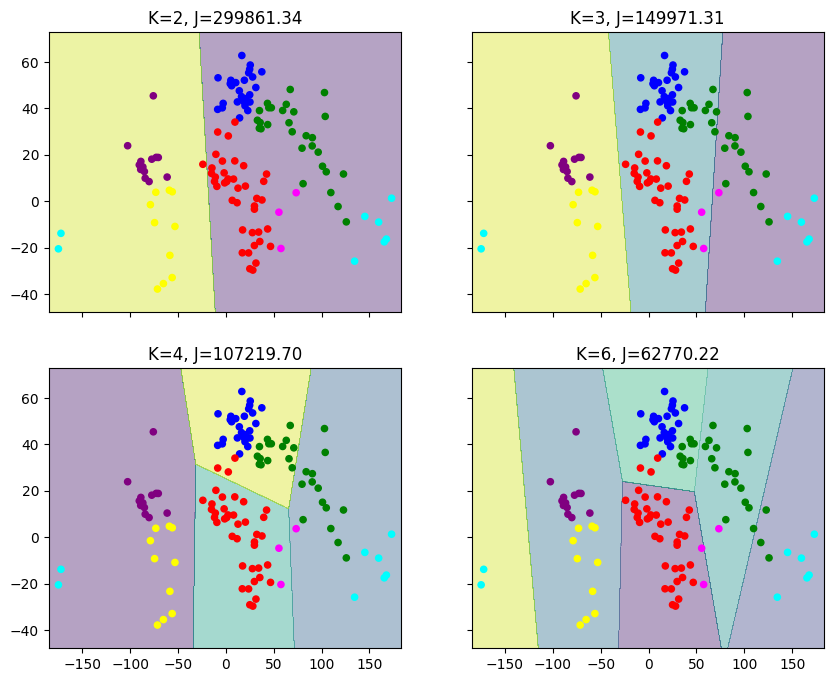

In [ ]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt



## How can Inertia be used to compare clusters? Can we propose a better metric for spatial datasets?

## Which is the main problem with the mercator representation for continent detection?

Inertia measures the total distance between samples and their cluster centroid. It can be used to evaluate the quality of clusters, with lower inertia values  indicating tighter and better-defined clusters.

We Plot the inertia values for a range of cluster numbers and look for the "elbow point" where the rate of decrease sharply changes. This point is often considered a good estimate for the optimal number of clusters.
Then we Compare inertia values between different clustering configurations to choose the one with the lowest inertia, considering the trade-off between the number of clusters and the compactness of clusters.


Inertia is sensitive to the scale of the data and can be heavily influenced by outliers. For spatial datasets, a better metric might be the Silhouette Score, which takes into account both the cohesion within clusters and the separation between clusters. It provides a normalized score in the range [-1, 1], where a high value indicates better-defined clusters.



The Mercator projection is a type of cylindrical map projection that distorts sizes and distances as you move away from the equator. This distortion can lead to misrepresentations in the spatial relationships between points on a map, particularly for regions at high latitudes.




  
  

## STEP 2: Spatial dataset normalization



We displace the origin of longitude to 30° east.

<ipython-input-5-0431ff539989>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Adjusted_Longitude'] = df1['Longitude'] - 30
<ipython-input-5-0431ff539989>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Wrapped_Longitude'] = df1['Adjusted_Longitude'].apply(lambda x: x + 360 if x < -180 else x)


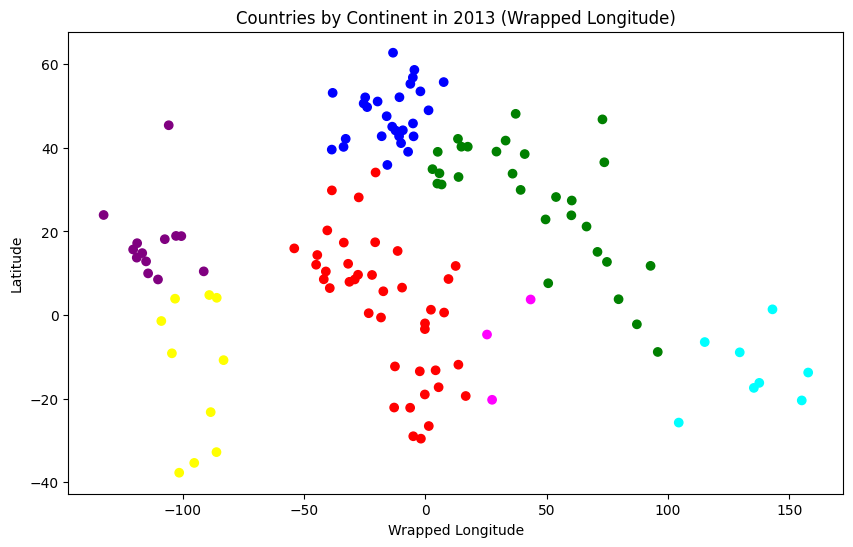

In [ ]:
# Adjusting the longitudes by wrapping around the values
df1['Adjusted_Longitude'] = df1['Longitude'] - 30
df1['Wrapped_Longitude'] = df1['Adjusted_Longitude'].apply(lambda x: x + 360 if x < -180 else x)
df_X_normalized = df1[['Wrapped_Longitude', 'Latitude']]
np1_normalized = df_X_normalized.to_numpy()

# Plotting the wrapped data
plt.figure(figsize=(10, 6))
plt.scatter(np1_normalized[:,0], np1_normalized[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.xlabel('Wrapped Longitude')
plt.ylabel('Latitude')
plt.title('Countries by Continent in 2013 (Wrapped Longitude)')
plt.show()





## What are the advantages of this normalization?

Normally, the longitude values abruptly jump from -180° to 180°, creating a discontinuity at the prime meridian. This wrapping eliminates that jump, ensuring continuity in the data, which is particularly beneficial for spatial analysis and clustering algorithms that rely on distance calculations.



We apply KMeans to the new normalized dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


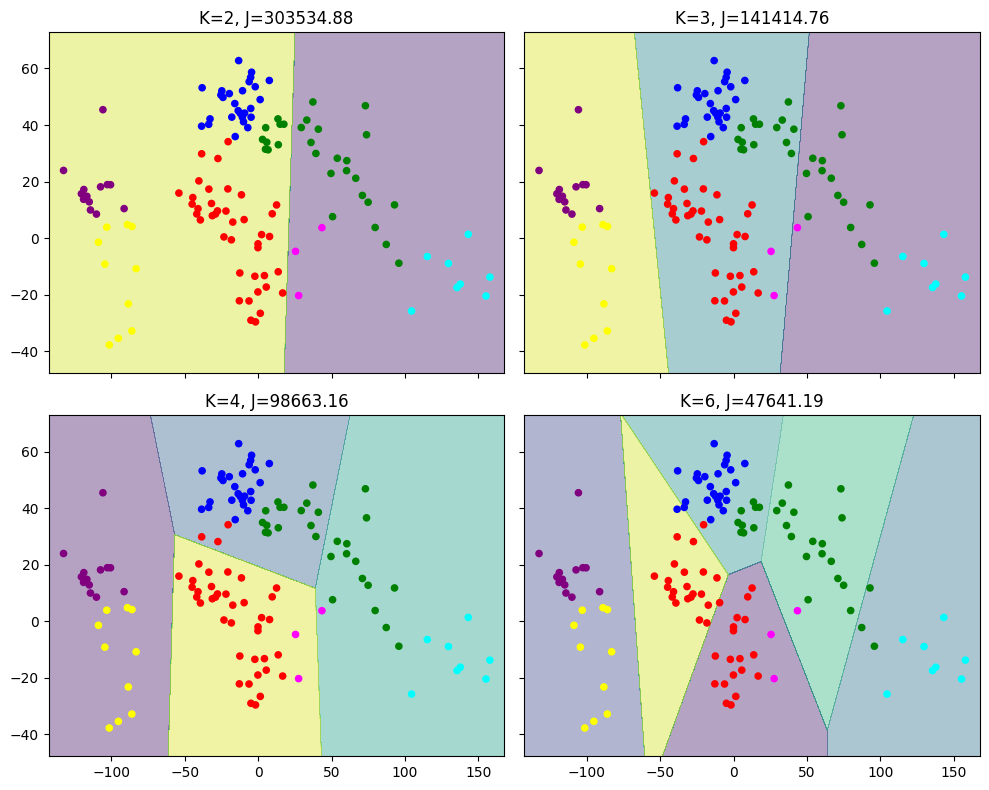

In [ ]:
# Setting up the grid boundaries for the wrapped dataset
x_min, x_max = np1_normalized[:, 0].min() - 10, np1_normalized[:, 0].max() + 10
y_min, y_max = np1_normalized[:, 1].min() - 10, np1_normalized[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Applying KMeans clustering for different cluster sizes on the wrapped dataset
km2_wrapped = cluster.KMeans(n_clusters=2).fit(np1_normalized)
km3_wrapped = cluster.KMeans(n_clusters=3).fit(np1_normalized)
km4_wrapped = cluster.KMeans(n_clusters=4).fit(np1_normalized)
km6_wrapped = cluster.KMeans(n_clusters=6).fit(np1_normalized)

# Plotting the clustering results in a 2x2 grid
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
for idx, km, tt in zip(product([0, 1], [0, 1]),
                       [km2_wrapped, km3_wrapped, km4_wrapped, km6_wrapped],
                       ["K=2, J=%.2f" % km2_wrapped.inertia_,
                        "K=3, J=%.2f" % km3_wrapped.inertia_,
                        "K=4, J=%.2f" % km4_wrapped.inertia_,
                        "K=6, J=%.2f" % km6_wrapped.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_normalized[:, 0], np1_normalized[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt.tight_layout()
plt.show()


Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")



We apply GMM to the normalized dataset.

We have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

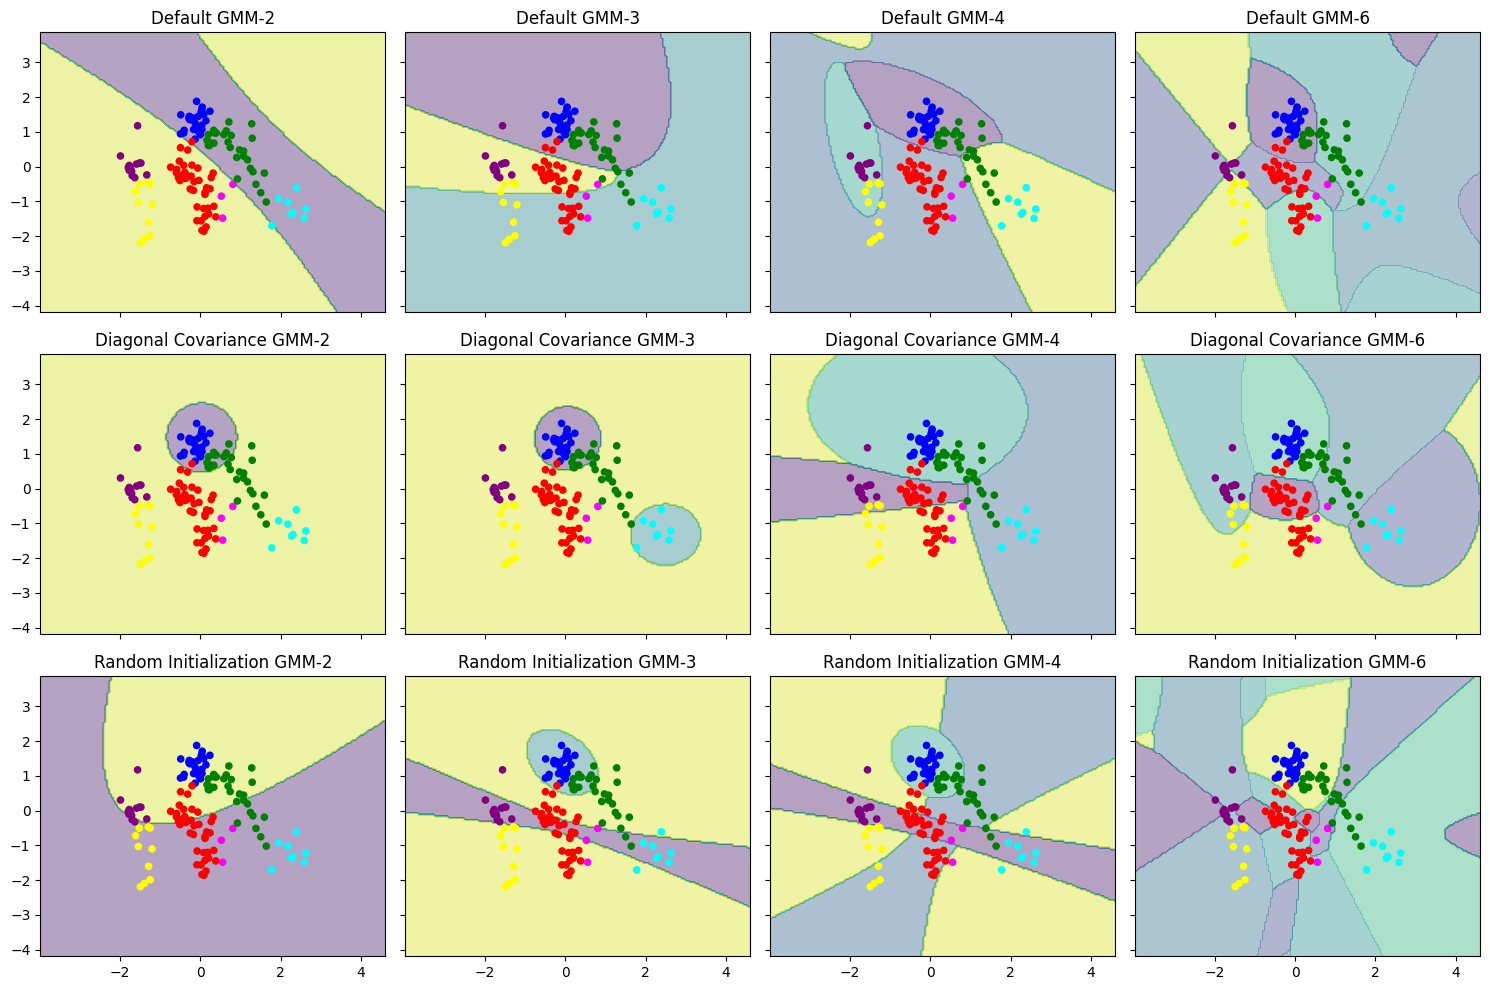

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

# Normalize the data
scaler = StandardScaler()
np1_normalized = scaler.fit_transform(np1_normalized)

# Initialize storage for GMM models and their titles for visualization
gmm_models = []
titles = []

# 1. GMM with default parameters for 2, 3, 4, and 6 components
for n in [2, 3, 4, 6]:
    gmm = GaussianMixture(n_components=n).fit(np1_normalized)
    gmm_models.append(gmm)
    titles.append(f"Default GMM-{n}")

# 2. GMM with diagonal covariance matrix for 2, 3, 4, and 6 components
for n in [2, 3, 4, 6]:
    gmm = GaussianMixture(n_components=n, covariance_type='diag').fit(np1_normalized)
    gmm_models.append(gmm)
    titles.append(f"Diagonal Covariance GMM-{n}")

# 3. GMM with random initialization for 2, 3, 4, and 6 components
for n in [2, 3, 4, 6]:
    gmm = GaussianMixture(n_components=n, init_params='random').fit(np1_normalized)
    gmm_models.append(gmm)
    titles.append(f"Random Initialization GMM-{n}")

gmm_models, titles



# Creating the meshgrid for the normalized dataset
x_min, x_max = np1_normalized[:, 0].min() - 2, np1_normalized[:, 0].max() + 2
y_min, y_max = np1_normalized[:, 1].min() - 2, np1_normalized[:, 1].max() + 2
xx_norm, yy_norm = np.meshgrid(np.arange(x_min, x_max, 0.05),
                               np.arange(y_min, y_max, 0.05))

# Visualizing the GMM cluster results on the normalized dataset

f, axarr = plt.subplots(3, 4, sharex='col', sharey='row', figsize=(15, 10))

for idx, gmm, title in zip(product([0, 1, 2], [0, 1, 2, 3]), gmm_models, titles):

    # Predict the cluster for each data point
    Z = gmm.predict(np.c_[xx_norm.ravel(), yy_norm.ravel()])
    Z = Z.reshape(xx_norm.shape)

    axarr[idx[0], idx[1]].contourf(xx_norm, yy_norm, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1_normalized[:, 0], np1_normalized[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(title)

plt.tight_layout()
plt.show()



In [ ]:
gmm = GaussianMixture(n_components=6).fit(df_X)
probs = gmm.predict_proba([[-50, -40]])
print(probs)

[[3.13054715e-02 2.29773221e-22 9.68694529e-01 1.22718442e-18
  2.74667546e-20 2.22557481e-14]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(




## Which is the best method to detect continents?



From the visualizations, we can assess which method best segregates the continents. Both K-Means and GMM can detect clusters, but GMM has soft boundaries, allowing for more flexibility.






Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

We apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

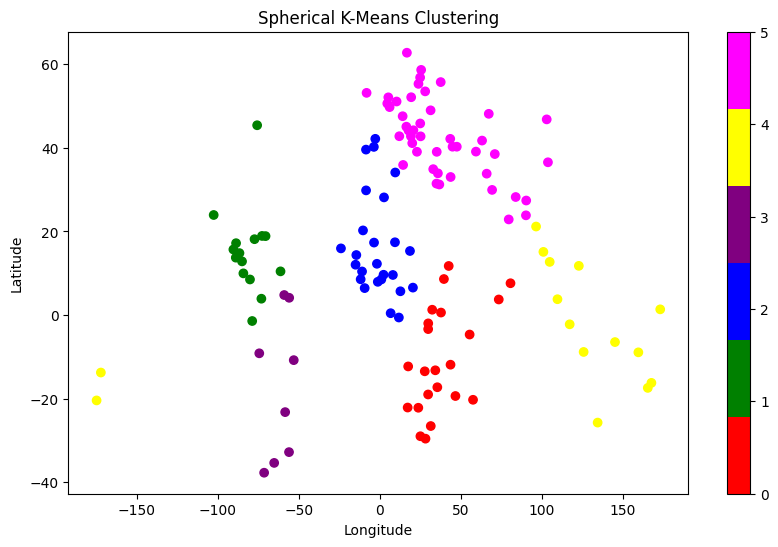

In [ ]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.utils.extmath import row_norms, safe_sparse_dot

def spherical_k_means(X, n_clusters, max_iter=300, tol=1e-4):
    # Normalize data to have unit norm
    X /= np.linalg.norm(X, axis=1)[:, np.newaxis]

    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iter):
        # Compute distances and assign clusters
        distances = cosine_distances(X, centroids)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        new_centroids /= np.linalg.norm(new_centroids, axis=1)[:, np.newaxis]

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return labels

# Convert latitude and longitude to 3D cartesian coordinates
def lat_lon_to_cartesian(lat, lon, R=1):
    lat, lon = np.radians(lat), np.radians(lon)
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R * np.sin(lat)
    return x, y, z

# Convert latitude and longitude data to cartesian coordinates
df_X_cartesian = df_X.apply(lambda row: lat_lon_to_cartesian(row['Latitude'], row['Longitude']), axis=1)
X_cartesian = np.array(list(df_X_cartesian))

# Apply spherical k-means with 6 clusters (as an example)
labels = spherical_k_means(X_cartesian, n_clusters=6)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(df_X['Longitude'], df_X['Latitude'], c=labels,
            cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta']))
plt.title("Spherical K-Means Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show()


## STEP 3: Detection of caribbean island



We isolate the North and South American continents.

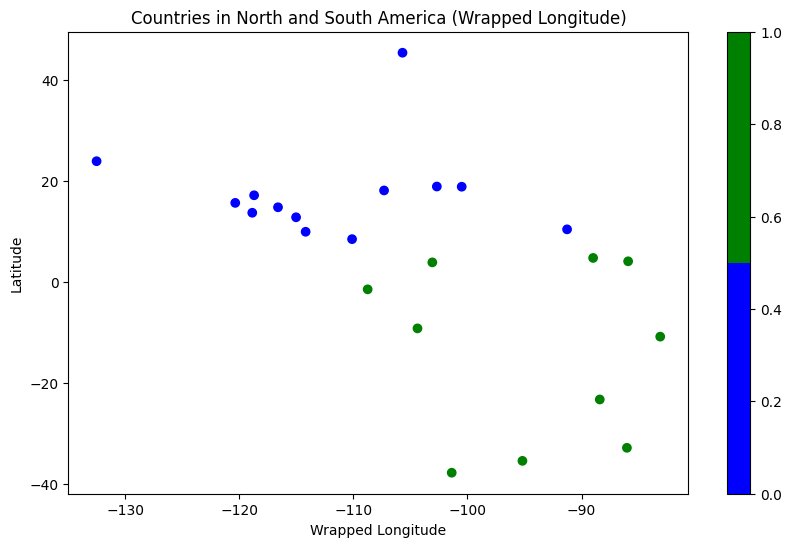

In [ ]:
# Filtering the dataset to only include North and South America
df_americas = df1[(df1['Continent'] == 'North America') | (df1['Continent'] == 'South America')]

# Extracting longitude and latitude data for the Americas
np_americas = df_americas[['Wrapped_Longitude', 'Latitude']].to_numpy()

# Plotting the data for the Americas
plt.figure(figsize=(10, 6))
plt.scatter(np_americas[:,0], np_americas[:,1], c=df_americas['Continent'].replace({'North America': 0, 'South America': 1}), cmap=matplotlib.colors.ListedColormap(['blue', 'green']))
plt.xlabel('Wrapped Longitude')
plt.ylabel('Latitude')
plt.title('Countries in North and South America (Wrapped Longitude)')
plt.colorbar()
plt.show()



We propose a methodology to create a cluster including caribbean independent nations.

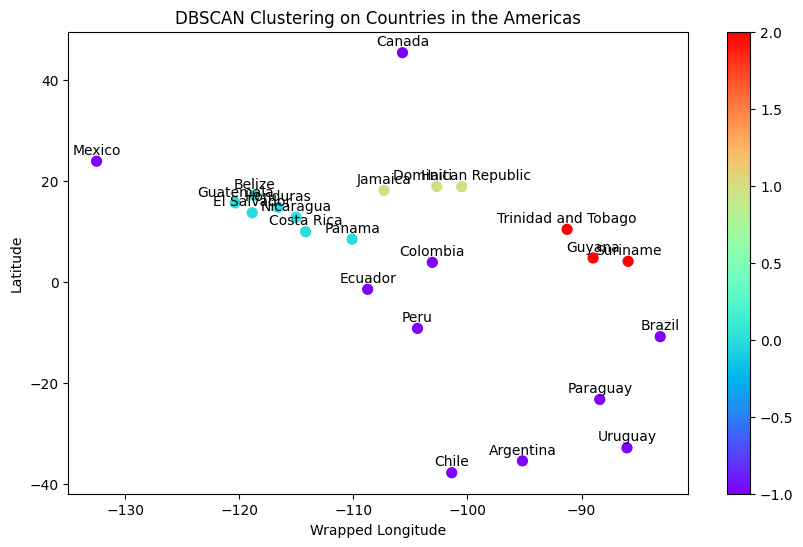

In [ ]:
from sklearn.cluster import DBSCAN

# Adjusting the DBSCAN parameters and re-clustering
dbscan_adjusted = DBSCAN(eps=8, min_samples=3)
clusters_adjusted = dbscan_adjusted.fit_predict(np_americas)

# Plotting the adjusted DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(np_americas[:, 0], np_americas[:, 1], c=clusters_adjusted, cmap='rainbow', s=50)
for idx, row in df_americas.iterrows():
    plt.annotate(row['Country'],  # this is the text
                 (row['Wrapped_Longitude'], row['Latitude']),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,5),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right, or center
plt.xlabel('Wrapped Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering on Countries in the Americas')
plt.colorbar()
plt.show()

# Identifying outliers in the adjusted clustering results
outliers_adjusted = df_americas[clusters_adjusted == -1]

outliers_adjusted[['Country', 'Wrapped_Longitude', 'Latitude']]

plt.show()





## Which is the outlier of this clustering problem?

The outlier is Trinidad and Tobago since it's very close to Guyana and Surinmae, and both don't belong to the Carribean countries

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

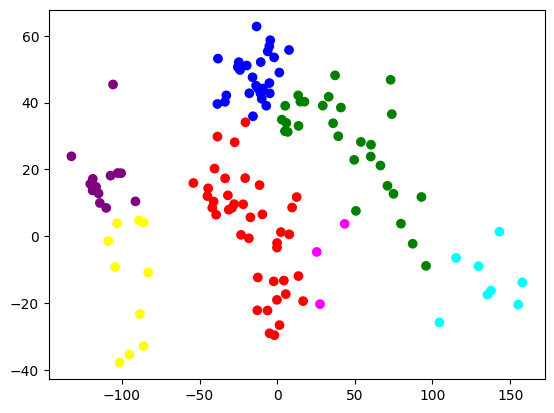

In [ ]:
df_X = df_X_normalized
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [ ]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


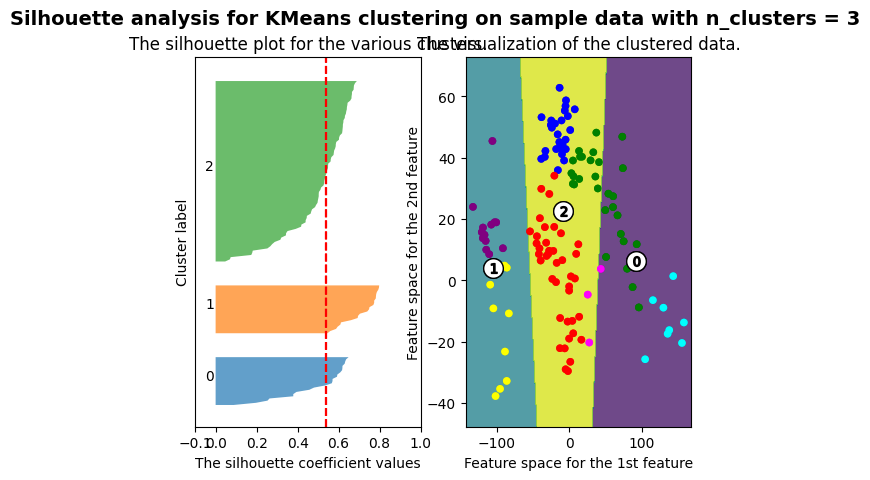

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



We Apply the previous code for different values of K (2,3,4 and 6).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4629634540221016


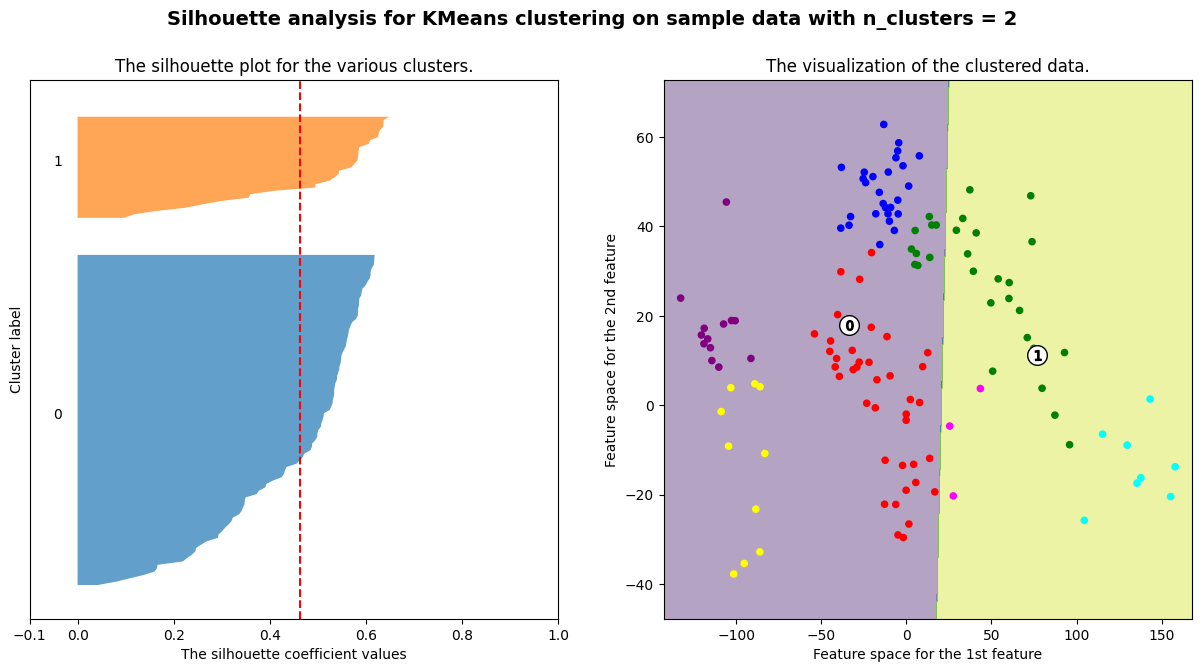

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


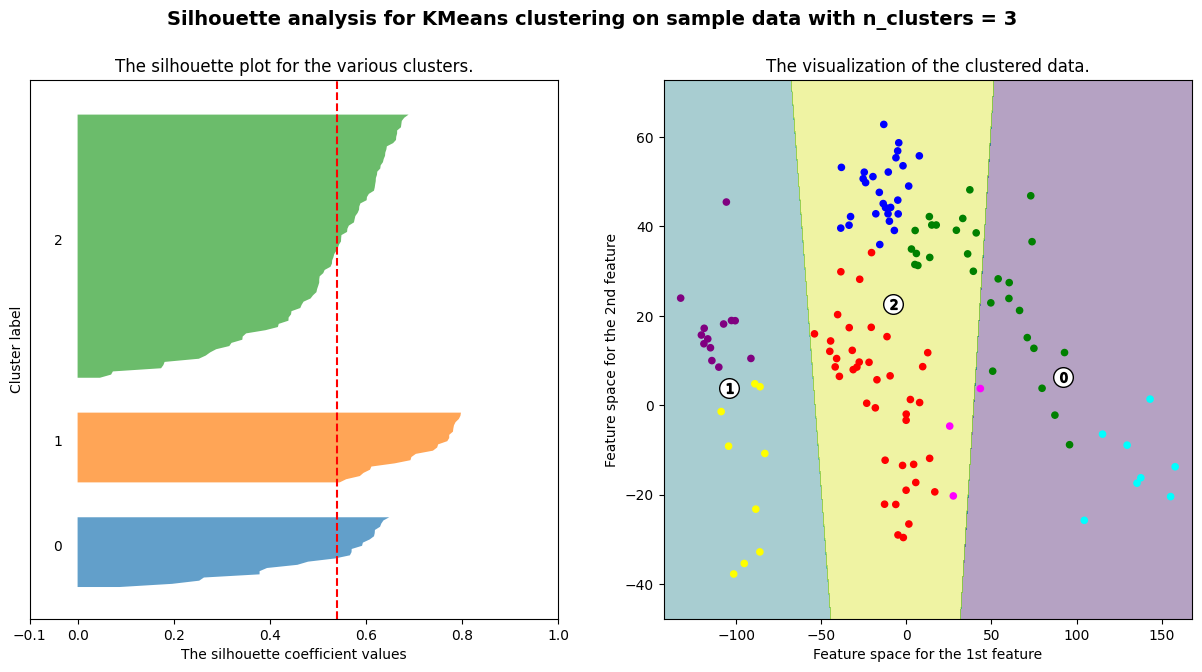

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4875009627702223


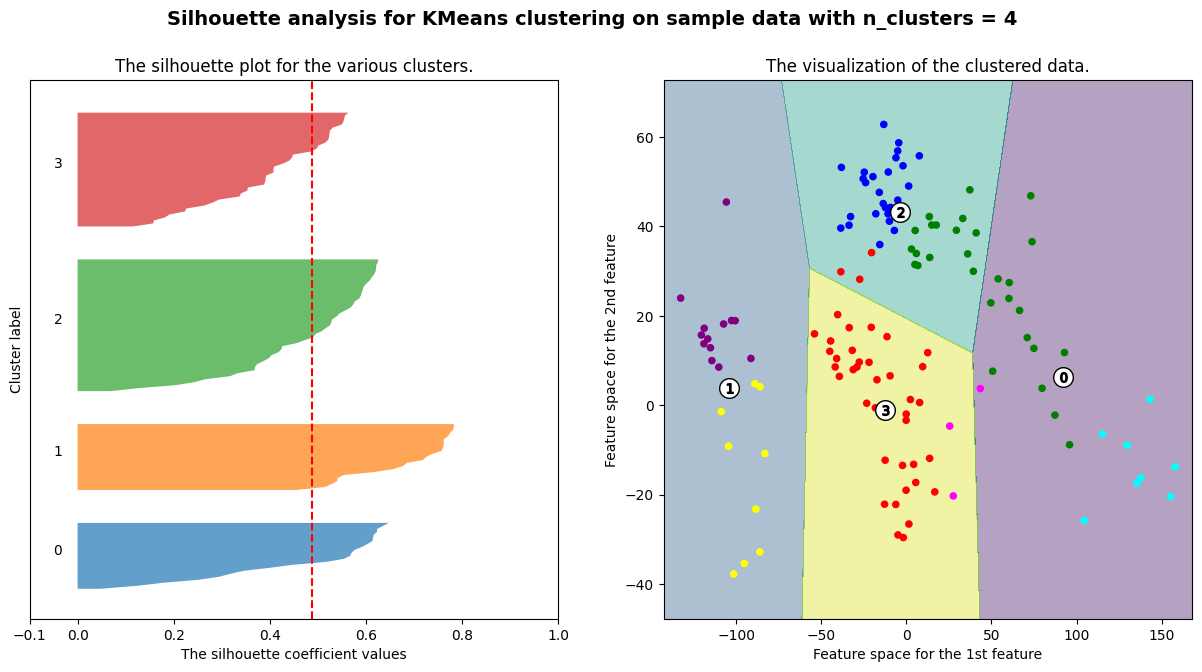

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5173447865610843


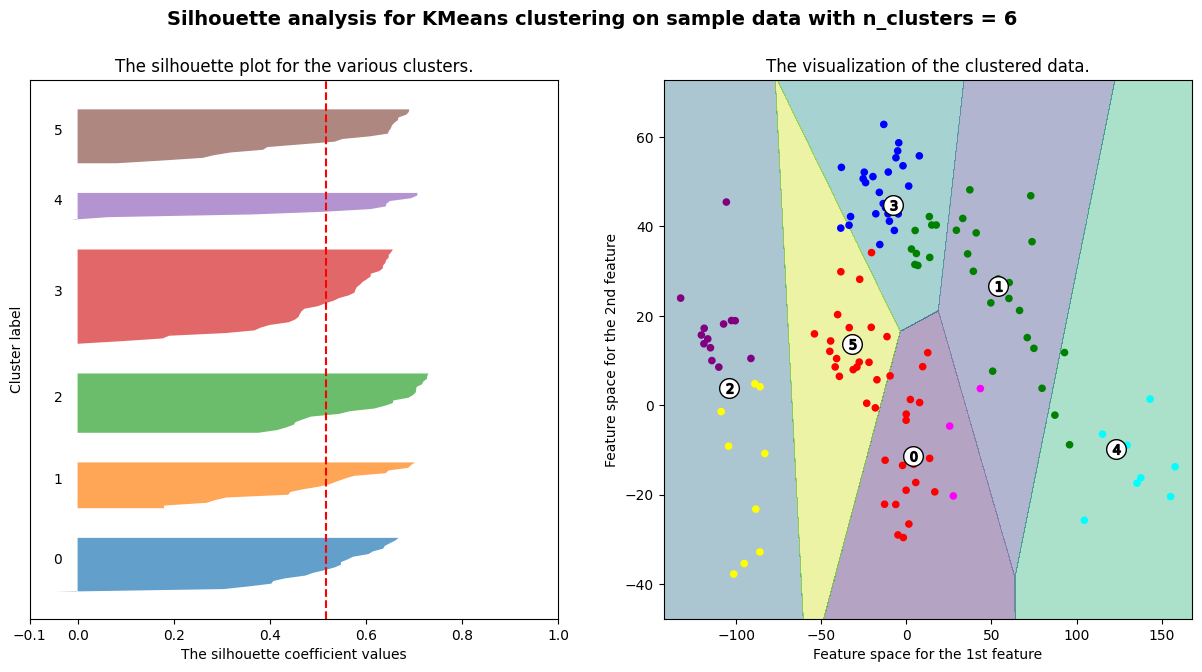

In [ ]:
# Function to plot silhouette analysis and clusters for a given K
def plot_silhouette_analysis(K, data, true_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (K + 1) * 10])

    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(data)

    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(data[:, 0], data[:, 1], c=true_labels, s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    centers = km.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {K}", fontsize=14, fontweight="bold")
    plt.show()

# Applying the silhouette analysis for different values of K
for K in [2, 3, 4, 6]:
    plot_silhouette_analysis(K, np1, np_Y)




## According to the silhouette score and the silhouette analysis, which is the most relevant value of K ?

For clarity of separation, **n_clusters = 2** and **n_clusters = 3** seem to perform better.
From a silhouette analysis perspective, **n_clusters = 2**, **n_clusters = 3**, and **n_clusters = 4** seem more consistent in cluster quality, while **n_clusters = 6** has wider variations in silhouette scores.

So **n_clusters = 3** seems to be the most balanced choice. It offers a higher number of reasonably well-defined clusters while maintaining clarity in the visual representation.



We compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Components to test
n_components_list = [2, 3, 4, 6]

# Different GMM configurations to evaluate
configs = [
    {"covariance_type": "full", "init_params": "kmeans"},
    {"covariance_type": "diag", "init_params": "kmeans"},
    {"covariance_type": "full", "init_params": "random"},
    {"covariance_type": "diag", "init_params": "random"},
]

# Store results here
results = {}

for config in configs:
    for n in n_components_list:
        gmm = GaussianMixture(n_components=n, **config)
        gmm_labels = gmm.fit_predict(np1_normalized)
        silhouette_avg = silhouette_score(np1_normalized, gmm_labels)

        config_name = f"GMM-{n} | Covariance: {config['covariance_type']} | Init: {config['init_params']}"
        results[config_name] = silhouette_avg

# Print the results
for config, score in results.items():
    print(f"{config} -> Silhouette Score: {score:.4f}")


GMM-2 | Covariance: full | Init: kmeans -> Silhouette Score: 0.3564
GMM-3 | Covariance: full | Init: kmeans -> Silhouette Score: 0.3885
GMM-4 | Covariance: full | Init: kmeans -> Silhouette Score: 0.4821
GMM-6 | Covariance: full | Init: kmeans -> Silhouette Score: 0.4897
GMM-2 | Covariance: diag | Init: kmeans -> Silhouette Score: 0.3545
GMM-3 | Covariance: diag | Init: kmeans -> Silhouette Score: 0.3306
GMM-4 | Covariance: diag | Init: kmeans -> Silhouette Score: 0.3956
GMM-6 | Covariance: diag | Init: kmeans -> Silhouette Score: 0.4559
GMM-2 | Covariance: full | Init: random -> Silhouette Score: 0.3361
GMM-3 | Covariance: full | Init: random -> Silhouette Score: 0.2332
GMM-4 | Covariance: full | Init: random -> Silhouette Score: 0.2043
GMM-6 | Covariance: full | Init: random -> Silhouette Score: 0.3741
GMM-2 | Covariance: diag | Init: random -> Silhouette Score: 0.3019
GMM-3 | Covariance: diag | Init: random -> Silhouette Score: 0.1626
GMM-4 | Covariance: diag | Init: random -> Silho



Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [ ]:
from sklearn.metrics import homogeneity_score

# Values of K to test
K_values = [2, 3, 4, 6]

# Ground truth labels
true_labels = np_Y

# Store results here
homogeneity_results = {}

for K in K_values:
    km = cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = km.fit_predict(np1_normalized)

    # Compute the homogeneity score
    h_score = homogeneity_score(true_labels, cluster_labels)

    homogeneity_results[K] = h_score

# Print the results
for K, score in homogeneity_results.items():
    print(f"For K={K} -> Homogeneity Score: {score:.4f}")


For K=2 -> Homogeneity Score: 0.1461
For K=3 -> Homogeneity Score: 0.3972
For K=4 -> Homogeneity Score: 0.5943
For K=6 -> Homogeneity Score: 0.6738


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



## According to the homogeneity score, which is the most relevant value of K ?


The score increases as K increases, with K=6 achieving the highest homogeneity score of 0.6738.

Therefore, according to the homogeneity score, the most relevant value of KKK is 6.

**We Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.**

In [ ]:
# Configurations for GMM
n_components_list = [2, 3, 4, 6]
covariance_types = ['full', 'tied', 'diag', 'spherical']

# Storage for results
results = []

# Looping through each configuration and calculating homogeneity scores
for n_components in n_components_list:
    for cov_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type)
        gmm_labels = gmm.fit_predict(np1_normalized)
        score = homogeneity_score(np_Y, gmm_labels)
        results.append({
            'n_components': n_components,
            'covariance_type': cov_type,
            'homogeneity_score': score
        })

# Sorting results by homogeneity score for easier interpretation
sorted_results = sorted(results, key=lambda x: x['homogeneity_score'], reverse=True)

for result in sorted_results:
    print(f"For n_components = {result['n_components']} and covariance type = {result['covariance_type']}: Homogeneity Score = {result['homogeneity_score']:.4f}")


For n_components = 6 and covariance type = diag: Homogeneity Score = 0.7328
For n_components = 6 and covariance type = full: Homogeneity Score = 0.6620
For n_components = 4 and covariance type = full: Homogeneity Score = 0.6579
For n_components = 4 and covariance type = diag: Homogeneity Score = 0.6531
For n_components = 6 and covariance type = spherical: Homogeneity Score = 0.6410
For n_components = 6 and covariance type = tied: Homogeneity Score = 0.6360
For n_components = 4 and covariance type = spherical: Homogeneity Score = 0.4932
For n_components = 4 and covariance type = tied: Homogeneity Score = 0.4445
For n_components = 3 and covariance type = tied: Homogeneity Score = 0.4178
For n_components = 3 and covariance type = spherical: Homogeneity Score = 0.4123
For n_components = 3 and covariance type = diag: Homogeneity Score = 0.3729
For n_components = 3 and covariance type = full: Homogeneity Score = 0.3428
For n_components = 2 and covariance type = full: Homogeneity Score = 0.28

## BONUS STEP 5: Alcoholism

We combine all the methods we used .

The main goal is to develop a complete methodology to answer general questions.



**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

In [ ]:
# Filter data for the year 2000
df_2000 = df[df['Year'] == 2000]

# Identify countries with alcohol consumption above the 75th percentile
threshold = df_2000['Alcohol'].quantile(0.75)
heavily_concerned = df_2000[df_2000['Alcohol'] > threshold]
heavily_concerned_countries = heavily_concerned['Country'].tolist()

print("Countries heavily concerned by Alcohol issue in 2000:", heavily_concerned_countries)


Countries heavily concerned by Alcohol issue in 2000: ['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Cyprus', 'France', 'Germany', 'Greece', 'Italy', 'Lithuania', 'Luxembourg', 'Poland', 'Portugal', 'Romania', 'Spain']


In [ ]:
# Correlation analysis
correlation_matrix = df_2000[df_2000['Country'].isin(heavily_concerned_countries)].corr()
alcohol_correlation = correlation_matrix['Alcohol'].sort_values(ascending=False)
linked_parameters = alcohol_correlation[(alcohol_correlation.abs() > 0.5) & (alcohol_correlation.abs() < 1.0)].index.tolist()

print("Parameters linked with Alcoholism in 2000:", linked_parameters)


Parameters linked with Alcoholism in 2000: ['Percentage_expenditure', 'GDP', 'Longitude', 'Hepatitis_B']


<ipython-input-30-d6eba52acbd9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_2000[df_2000['Country'].isin(heavily_concerned_countries)].corr()


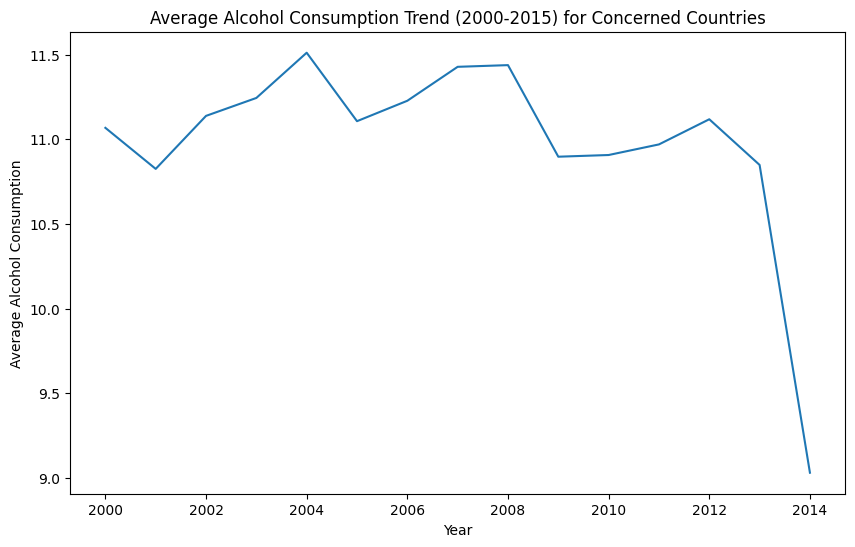

In [ ]:
df_2000_2015 = df[(df['Year'] >= 2000) & (df['Year'] <= 2015) & (df['Country'].isin(heavily_concerned_countries))]

# Average alcohol consumption trend for concerned countries from 2000 to 2015
avg_alcohol_consumption = df_2000_2015.groupby(['Year'])['Alcohol'].mean()

plt.figure(figsize=(10,6))
avg_alcohol_consumption.plot(title="Average Alcohol Consumption Trend (2000-2015) for Concerned Countries")
plt.ylabel('Average Alcohol Consumption')
plt.show()


<Figure size 1000x600 with 0 Axes>

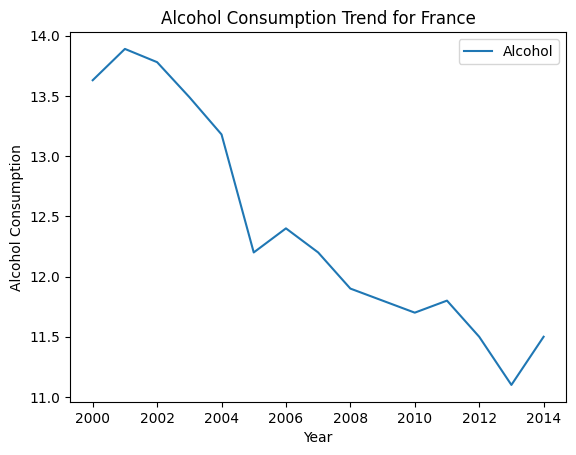

In [ ]:
selected_country = heavily_concerned_countries[5]  # Taking the first country for demonstration
country_data = df[(df['Country'] == selected_country) & (df['Year'] >= 2000) & (df['Year'] <= 2015)]

plt.figure(figsize=(10,6))
country_data.plot(x='Year', y='Alcohol', title=f"Alcohol Consumption Trend for {selected_country}")
plt.ylabel('Alcohol Consumption')
plt.show()

# For explaining the increase or decrease, external research or additional data sources would be needed.
